Customer churn/attrition/turnover is the loss of clients or customers during a certain time frame.

In [72]:
%matplotlib inline
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  

In [79]:
df=pd.read_csv(r'C:\Users\user\Desktop\ADS\Africa-Data-School\banking_churn.csv')
#Understanding The Data set through EDA....
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [57]:
#Convert object dtype to category dtype for feature processing
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=df[i].astype('category')

df.dtypes
        

RowNumber             int64
CustomerId            int64
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

In [68]:
#Feature Selection
columns=df.columns.values.tolist()
print(columns)


['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [74]:
# Only specific columns would affect the Customer churn. Remove RowNumber,CustomerId and Surname columns from feature set.
dataset=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

#Converting Categorical Columns to Numeric Columns; Geograpy and Gender Columns need to be converted to numeric columns.
dataset=dataset.drop(['Geography','Gender'],axis=1)

#One-hot encoding for Columns with three or more categories like Geography. 
Geography = pd.get_dummies(df.Geography).iloc[:,1:]
Gender = pd.get_dummies(df.Gender).iloc[:,1:]

#get_dummies method of pandas converts categorical columns to numeric columns then .iloc[:,1:] ignores the first column and returns the rest of the columns i.e n categories represented by n-1 columns.
print(Geography)

      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]


In [75]:
#Adding Geography and Gender data frames back to the data set we use the concat function from pandas to horizontally concatenate.
dataset=pd.concat([dataset,Geography,Gender],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Germany          10000 non-null  uint8  
 10  Spain            10000 non-null  uint8  
 11  Male             10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [77]:
#Data Preprocessing where we train the ML model. We first isolate the variable we're predicting from the dataset.

X=dataset.drop(['Exited'],axis=1)           #X is the feature set
y=dataset['Exited']                         #y contains only the Exited column#

#To Evaluate performance of the ML model we divide the data into training and test set. 20% for testing, 80% for training.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

#ML Algorithm training will identify patterns or trends in training the data. We use Random Forest Algorithm for this classification problem.

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)

In [78]:
#ML Algorithm Evaluation
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635


In [ ]:
#Result indicate an accuracy of 86.35% which means that the algorithm successfully predicts customer churn 86.35% of the time.

<AxesSubplot:>

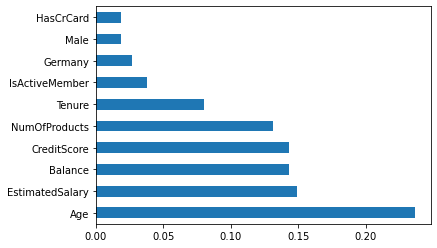

In [81]:
#Feature Evaluation:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
#Age has the highest impact on customer churn followed by a customer's estimated salary and account balance.